In [1]:
import keras
from keras import backend as K
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.mobilenet import preprocess_input
from keras.callbacks import EarlyStopping
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
def prepare_image(img_path, file):
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return preprocess_input(img_array_expanded_dims)

In [3]:
TRAIN_PATH = "./dataset-extracted/train"
TEST_PATH = "./dataset-extracted/val"

In [4]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(TRAIN_PATH,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training',
                                                 shuffle=True)

val_generator=train_datagen.flow_from_directory(TRAIN_PATH,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='validation',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory(TEST_PATH,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 778 images belonging to 32 classes.
Found 187 images belonging to 32 classes.
Found 291 images belonging to 32 classes.


In [40]:
base_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(224,224,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x) 
x = BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
x=Dropout(0.3)(x)
preds=Dense(32,activation='softmax')(x)

In [47]:
model=Model(inputs=base_model.input,outputs=preds)
# model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,355,938 (12.80 MB)

 Trainable params: 365,728 (1.40 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

 Optimizer params: 731,458 (2.79 MB)

In [42]:
print(len(model.layers))

162


In [43]:
for layer in model.layers[:154]:
    layer.trainable=False
for layer in model.layers[154:]:
    layer.trainable=True

In [44]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True)

history = model.fit(train_generator,
                  validation_data=val_generator,
                  steps_per_epoch=step_size_train,
                  callbacks=[early_stopping],
                  epochs=20)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step - accuracy: 0.0832 - loss: 3.8728 - val_accuracy: 0.1283 - val_loss: 3.2409
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.1250 - loss: 3.2273 - val_accuracy: 0.1390 - val_loss: 3.2199
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - accuracy: 0.3169 - loss: 2.3868 - val_accuracy: 0.2193 - val_loss: 2.7550
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3125 - loss: 2.0396 - val_accuracy: 0.2299 - val_loss: 2.7293
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.4858 - loss: 1.7562 - val_accuracy: 0.3743 - val_loss: 2.2717
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5625 - loss: 1.6782 - val_accuracy: 0.3690 - val_loss: 2.2577
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - accuracy: 0.6125 - loss: 1.3450 - val_accuracy: 0.4332 - val_loss: 2.0216
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6875 - loss: 1.1954 - val_accuracy: 0.44

Text(0, 0.5, 'Loss')

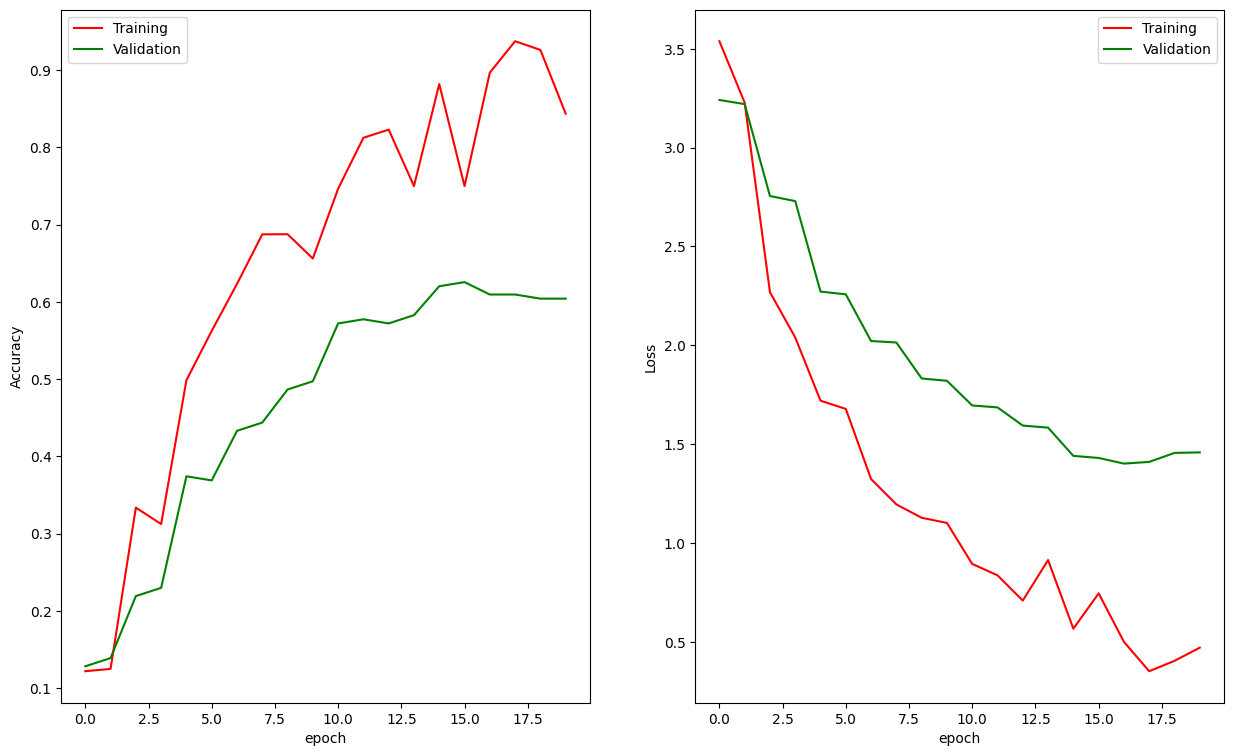

In [45]:
plt.figure(figsize=(15,9))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training', color='r')
plt.plot(history.history['val_accuracy'], label='Validation', color='g')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training', color='r')
plt.plot(history.history['val_loss'], label='Validation', color='g')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')

In [46]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.6304 - loss: 1.3166
Test Loss: 1.3073054552078247
Test Accuracy: 0.6323024034500122
